# Life Expectancy vs GDP

## Summary
This analysis evaluates if there is a strong correlation between a population's life expectancy and the country's GDP. The data comes from the **World Health Organization** and the **World Bank**.  The data set, `all_data.csv` provides information on six countries spanning 15 years.

## Analysis and Evaluation

### Step 1: Setup

In [1]:
import csv
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Read data
data = pd.read_csv('all_data.csv')
print(data.head(5))

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


Reviewing the data from `all_data.csv`, we can see that there are 4 columns: Country, Year, Life expectancy at birth (years), and GDP.  We already know that there is data from six countries.  Reviewing the information above, we can also see there are no Null or missing values and no binary variables.  In the next step we will check which countries are found in the provided data.

In [8]:
coutnry_list = data['Country'].unique()
print(coutnry_list)

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


### Step 2: Analysis and Evaluation

From the output we see that the six countries are: **Chile, China, Germany, Mexico, United States of America, and Zimbabwe.**  For the analysis we are going to look at some summary statistics for all countries together.

In [11]:
# Descriptive statistics
summary_statistics = data.describe()
print(summary_statistics)


              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13


We can see some basic summary statistics here for all countries.  The **Mean Vales** are 72.8 years and a GDP of 3.8e+12.  The **Minimum Values** are 44.3 years and 4.4e+9; while the **Maximum Values** are 81.0 years and 1.8e+13.

Next we are going to break the data down by country to conduct the remainder of the analyses.

In [13]:
# separate data by country into individual lists
chile = data[data['Country'] == 'Chile']
china = data[data['Country'] == 'China']
germany = data[data['Country'] == 'Germany']
mexico = data[data['Country'] == 'Mexico']
usa = data[data['Country'] == 'United States of America']
zimbabwe = data[data['Country'] == 'Zimbabwe']

print(chile)

   Country  Year  Life expectancy at birth (years)           GDP
0    Chile  2000                              77.3  7.786093e+10
1    Chile  2001                              77.3  7.097992e+10
2    Chile  2002                              77.8  6.973681e+10
3    Chile  2003                              77.9  7.564346e+10
4    Chile  2004                              78.0  9.921039e+10
5    Chile  2005                              78.4  1.229650e+11
6    Chile  2006                              78.9  1.547880e+11
7    Chile  2007                              78.9  1.736060e+11
8    Chile  2008                              79.6  1.796380e+11
9    Chile  2009                              79.3  1.723890e+11
10   Chile  2010                              79.1  2.185380e+11
11   Chile  2011                              79.8  2.522520e+11
12   Chile  2012                              79.9  2.671220e+11
13   Chile  2013                              80.1  2.783840e+11
14   Chile  2014         

The first visualization that we are going to review is the **Change in GDP vs Time** for all countries.

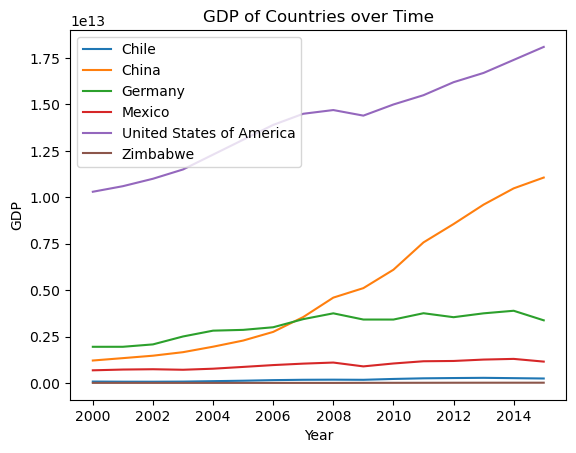

<Figure size 640x480 with 0 Axes>

In [15]:
# years will be the x axis
years = data['Year'].unique()

# create lists of GDP for each country
chile_gdp = chile['GDP'].tolist()
china_gdp = china['GDP'].tolist()
germany_gdp = germany['GDP'].tolist()
mexico_gdp = mexico['GDP'].tolist()
usa_gdp = usa['GDP'].tolist()
zimbabwe_gdp = zimbabwe['GDP'].tolist()

# create a line graph comparing gdp for all countries
plt.plot(years, chile_gdp, label='Chile')
plt.plot(years, china_gdp, label='China')
plt.plot(years, germany_gdp, label='Germany')
plt.plot(years, mexico_gdp, label='Mexico')
plt.plot(years, usa_gdp, label='United States of America')
plt.plot(years, zimbabwe_gdp, label='Zimbabwe')
plt.legend()
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP of Countries over Time')
plt.show()
plt.clf()

We can see in the line plot that the USA had the highest GDP over the course of the time from 2000 - 2015, while Zimbabwe had the lowest followed closely by Chile.  What is interesting is the sharp climb that China's GDP too around 2006 to close the gap between China and the USA. The other countries GDP remained essentially flat and stable over the course of the 15 year timeframe.

For comparison, we are going to look at a box plot for the same information of GDP vs time.

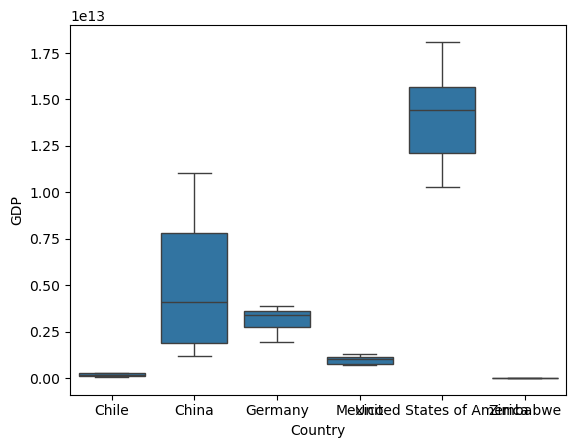

<Figure size 640x480 with 0 Axes>

In [24]:
sns.boxplot(x = 'Country', y = 'GDP', data = data)
plt.show()
plt.clf()

The boxplot confirmed the assessment that the line plot provided.

The next analysis will be the comparison of life expectancy vs GDP for each country individually.

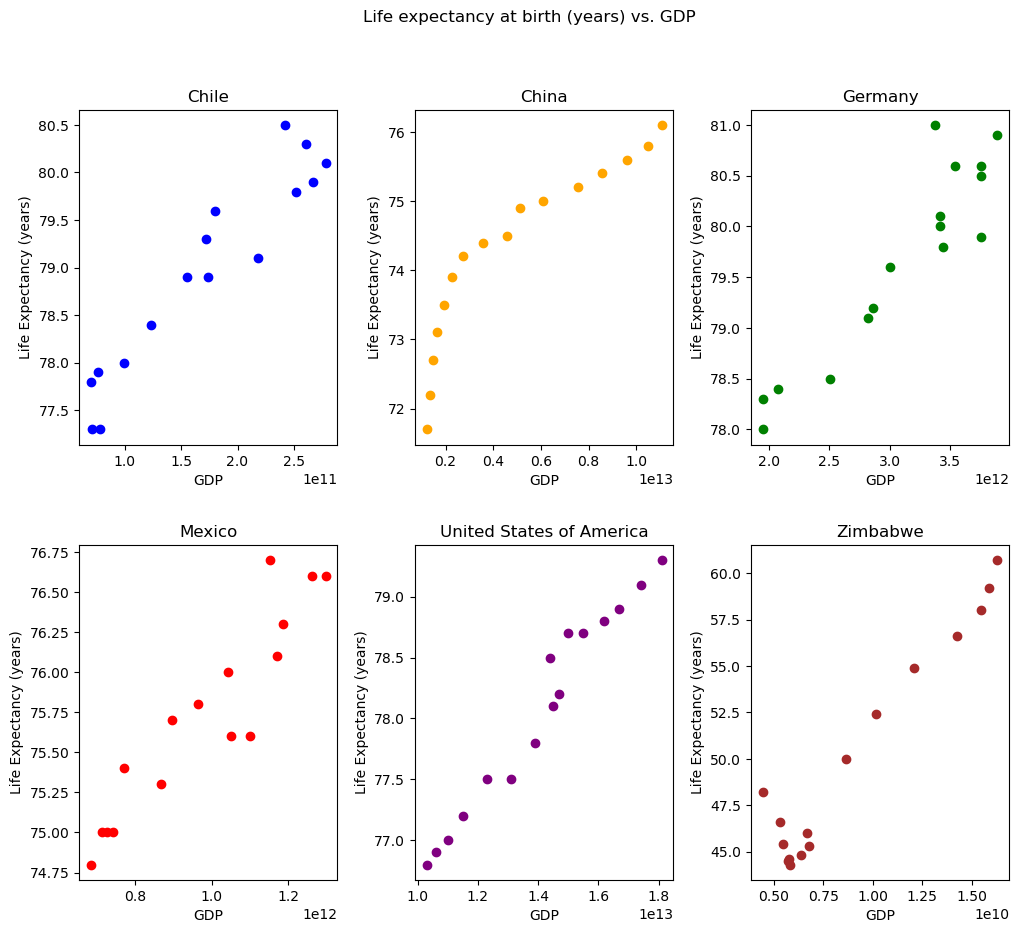

<Figure size 640x480 with 0 Axes>

In [42]:
# create figure
plt.figure(figsize=(12, 10))

# setup scatter plots for each country
plt.subplot(2, 3, 1)
plt.scatter(chile['GDP'], chile['Life expectancy at birth (years)'], color='blue')
plt.title('Chile')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy (years)')

plt.subplot(2, 3, 2)
plt.scatter(china['GDP'], china['Life expectancy at birth (years)'], color='orange')
plt.title('China')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy (years)')

plt.subplot(2, 3, 3)
plt.scatter(germany['GDP'], germany['Life expectancy at birth (years)'], color='green')
plt.title('Germany')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy (years)')

plt.subplot(2, 3, 4)
plt.scatter(mexico['GDP'], mexico['Life expectancy at birth (years)'], color='red')
plt.title('Mexico')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy (years)')

plt.subplot(2, 3, 5)
plt.scatter(usa['GDP'], usa['Life expectancy at birth (years)'], color='purple')
plt.title('United States of America')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy (years)')

plt.subplot(2, 3, 6)
plt.scatter(zimbabwe['GDP'], zimbabwe['Life expectancy at birth (years)'], color='brown')
plt.title('Zimbabwe')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy (years)')

# adjust spacing
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# add title
plt.suptitle('Life expectancy at birth (years) vs. GDP')

# show plots
plt.show()
plt.clf()

# save figure

Reviewing the scatter plots it is clear to see that as GDP increases, which for almost all countries it has, life expectancy also increases.  This makes sense on another level, becuase as a country increases its GDP then the health care gets better, which in turn causes the life expectency to increase.  Another factor that can contribute to the longer life expectancy with the increase in GDP is that the infrastructure improves, allowing better access to basic needs.